## IMPORT LIBRARY

In [1]:
import tensorflow as tf
import numpy
import seaborn as sns
from keras.layers import Flatten,Dense
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

## VISUALISASI DATASET

In [2]:
class_names=os.listdir("Train")
print(f"classes: {','.join(class_names)}")
folders = os.listdir('Train')
for folder in folders:
    print(f"{folder} : {len(os.listdir(f'Train/{folder}'))}")

classes: A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y
A : 305
B : 343
C : 345
D : 348
E : 295
F : 343
G : 347
H : 320
I : 340
K : 325
L : 306
M : 344
N : 332
O : 337
P : 308
Q : 320
R : 337
S : 339
T : 336
U : 316
V : 336
W : 335
X : 330
Y : 328


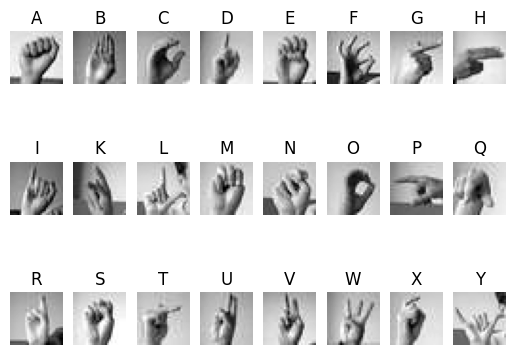

In [3]:
for i,folder in enumerate(folders):
    plt.subplot(3, 8, i + 1)
    plt.title(folder)
    plt.axis('off')
    if ((os.listdir('Train//'+folder)[0])=='.ipynb_checkpoints'):
        plt.imshow(plt.imread(f"Train//{folder}//{os.listdir('Train//'+folder)[2]}"),cmap="gray")
        pass
    else:
        plt.imshow(plt.imread(f"Train//{folder}//{os.listdir('Train//'+folder)[0]}"),cmap="gray")
plt.show()